# Data Preparation

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [4]:
od = pd.read_csv('order_details.csv')
o = pd.read_csv('orders.csv')
p = pd.read_csv('pizzas.csv')
pt = pd.read_csv('pizza_types.csv')

In [5]:
# order_details
potter_url = 'https://drive.google.com/file/d/1lvGPQpkHyDcvUEX96cXWIuFblyqszAcy/view?usp=drive_link'
potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2]
pd.set_option('display.max_columns', None)
od = pd.read_csv(potter)
od

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [6]:
# orders
potter_url = 'https://drive.google.com/file/d/1mAyxmEIy5ktUzmU4xjtm6WJeOsSN_Uyv/view?usp=drive_link'
potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2]
pd.set_option('display.max_columns', None)
o = pd.read_csv(potter)
o

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [7]:
# pizzas
potter_url = 'https://drive.google.com/file/d/1mDO9S3TQjFwfY_ehR5UwODJ2dWYeVgnv/view?usp=drive_link'
potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2]
pd.set_option('display.max_columns', None)
p = pd.read_csv(potter)
p

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [8]:
# pizza_types
potter_url = 'https://drive.google.com/file/d/1mLGfqTDpUUD9r1Lc3MORF-VqgWo45Avn/view?usp=drive_link'
potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2]
pd.set_option('display.max_columns', None)
pt = pd.read_csv(potter)
pt

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


# DATA CLEANING

In [9]:
od

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [10]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
od.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [12]:
od.duplicated().sum()

0

In [13]:
od['pizza_id']

0           hawaiian_m
1        classic_dlx_m
2        five_cheese_l
3          ital_supr_l
4           mexicana_m
             ...      
48615    ckn_alfredo_m
48616    four_cheese_l
48617     napolitana_s
48618       mexicana_l
48619        bbq_ckn_s
Name: pizza_id, Length: 48620, dtype: object

In [14]:
od['quantity'].value_counts()

quantity
1    47693
2      903
3       21
4        3
Name: count, dtype: int64

In [15]:
o

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [16]:
o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [17]:
o.isna().sum()

order_id    0
date        0
time        0
dtype: int64

In [18]:
o.duplicated().sum()

0

In [19]:
o['date'] = pd.to_datetime(o['date'])

In [20]:
o['time'] = pd.to_datetime(o['time'], format='%H:%M:%S').dt.time

In [21]:
o['hour'] = pd.to_datetime(o['time'], format='%H:%M:%S').dt.hour

In [22]:
o['hour'].value_counts().sort_index()

hour
9        1
10       8
11    1231
12    2520
13    2455
14    1472
15    1468
16    1920
17    2336
18    2399
19    2009
20    1642
21    1198
22     663
23      28
Name: count, dtype: int64

In [23]:
def category_time(x):
    if x <= 11:
        return 'morning'
    elif x <= 18:
        return 'afternoon'
    else:
        return 'night'

In [24]:
o['daytime'] = o['hour'].apply(category_time)

In [25]:
o[['hour', 'daytime']].value_counts().sort_index()

hour  daytime  
9     morning         1
10    morning         8
11    morning      1231
12    afternoon    2520
13    afternoon    2455
14    afternoon    1472
15    afternoon    1468
16    afternoon    1920
17    afternoon    2336
18    afternoon    2399
19    night        2009
20    night        1642
21    night        1198
22    night         663
23    night          28
Name: count, dtype: int64

In [26]:
p

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [27]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [28]:
p.isna().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

In [29]:
p.duplicated().sum()

0

In [30]:
p['price'].value_counts().sort_index()

price
9.75      1
10.50     1
11.00     1
11.75     1
12.00    10
12.25     2
12.50     9
12.75     7
13.25     1
14.50     1
14.75     1
15.25     1
15.50     1
16.00    10
16.25     2
16.50     8
16.75     7
17.50     1
17.95     1
18.50     1
20.25     7
20.50     5
20.75    13
21.00     1
23.65     1
25.50     1
35.95     1
Name: count, dtype: int64

In [31]:
p[p['price']==35.95]

,pizza_id,pizza_type_id,size,price
43,the_greek_xxl,the_greek,XXL,35.95


In [32]:
p[p['pizza_type_id']=='the_greek']

,pizza_id,pizza_type_id,size,price
39,the_greek_s,the_greek,S,12.00
40,the_greek_m,the_greek,M,16.00
41,the_greek_l,the_greek,L,20.50
42,the_greek_xl,the_greek,XL,25.50
43,the_greek_xxl,the_greek,XXL,35.95


In [33]:
pt

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [34]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [35]:
pt.isna().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [36]:
pt.duplicated().sum()

0

In [37]:
order = od.merge(right=o, how='inner', on='order_id')
order

,order_details_id,order_id,pizza_id,quantity,date,time,hour,daytime
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,11,morning
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,11,morning
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,11,morning
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,11,morning
4,5,2,mexicana_m,1,2015-01-01,11:57:40,11,morning
...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,21,night
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,21,night
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,21,night
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,22,night


In [38]:
pizza = p.merge(right=pt, how='inner', on='pizza_type_id')
pizza

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
...,...,...,...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
92,spinach_fet_l,spinach_fet,L,20.25,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
93,veggie_veg_s,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
94,veggie_veg_m,veggie_veg,M,16.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


In [39]:
df = order.merge(right=pizza, how='inner', on='pizza_id')
df

,order_details_id,order_id,pizza_id,quantity,date,time,hour,daytime,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,11,morning,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,12,afternoon,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,14,afternoon,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,16,afternoon,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,20,night,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,39733,17492,the_greek_xxl,1,2015-10-24,18:58:20,18,afternoon,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48616,41183,18139,the_greek_xxl,1,2015-11-05,20:28:52,20,night,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48617,42718,18789,the_greek_xxl,1,2015-11-17,11:23:51,11,morning,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48618,43041,18919,the_greek_xxl,1,2015-11-19,16:58:26,16,afternoon,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."


In [40]:
df['total'] = df['quantity'] * df['price']

In [41]:
df_total = df.pop('total')

In [42]:
df

,order_details_id,order_id,pizza_id,quantity,date,time,hour,daytime,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,11,morning,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,12,afternoon,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,14,afternoon,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,16,afternoon,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,20,night,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,39733,17492,the_greek_xxl,1,2015-10-24,18:58:20,18,afternoon,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48616,41183,18139,the_greek_xxl,1,2015-11-05,20:28:52,20,night,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48617,42718,18789,the_greek_xxl,1,2015-11-17,11:23:51,11,morning,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48618,43041,18919,the_greek_xxl,1,2015-11-19,16:58:26,16,afternoon,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."


In [43]:
df.insert(9, column='total', value=df_total)

In [44]:
df

,order_details_id,order_id,pizza_id,quantity,date,time,hour,daytime,pizza_type_id,total,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,11,morning,hawaiian,13.25,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,12,afternoon,hawaiian,13.25,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,14,afternoon,hawaiian,13.25,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,16,afternoon,hawaiian,13.25,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,20,night,hawaiian,13.25,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,39733,17492,the_greek_xxl,1,2015-10-24,18:58:20,18,afternoon,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48616,41183,18139,the_greek_xxl,1,2015-11-05,20:28:52,20,night,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48617,42718,18789,the_greek_xxl,1,2015-11-17,11:23:51,11,morning,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48618,43041,18919,the_greek_xxl,1,2015-11-19,16:58:26,16,afternoon,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."


<Axes: xlabel='price'>

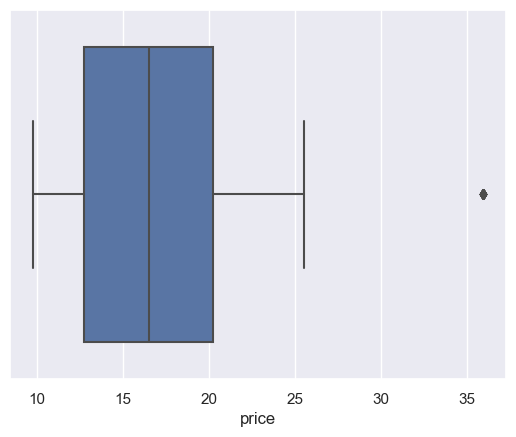

In [45]:
sns.boxplot(data=df,
            x='price')

In [46]:
df[df['size'] == 'XXL']

,order_details_id,order_id,pizza_id,quantity,date,time,hour,daytime,pizza_type_id,total,size,price,name,category,ingredients
48592,3448,1528,the_greek_xxl,1,2015-01-26,15:24:38,15,afternoon,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48593,3564,1581,the_greek_xxl,1,2015-01-27,16:28:38,16,afternoon,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48594,5902,2614,the_greek_xxl,1,2015-02-13,13:52:26,13,afternoon,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48595,6366,2813,the_greek_xxl,1,2015-02-16,18:15:02,18,afternoon,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48596,7491,3297,the_greek_xxl,1,2015-02-25,12:57:10,12,afternoon,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48597,9845,4307,the_greek_xxl,1,2015-03-14,13:19:35,13,afternoon,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48598,10283,4498,the_greek_xxl,1,2015-03-17,16:22:45,16,afternoon,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48599,10876,4761,the_greek_xxl,1,2015-03-21,18:10:58,18,afternoon,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48600,13512,5927,the_greek_xxl,1,2015-04-10,14:02:08,14,afternoon,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48601,13780,6038,the_greek_xxl,1,2015-04-12,11:51:07,11,morning,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."


# EDA

In [47]:
df

,order_details_id,order_id,pizza_id,quantity,date,time,hour,daytime,pizza_type_id,total,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,11,morning,hawaiian,13.25,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,12,afternoon,hawaiian,13.25,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,14,afternoon,hawaiian,13.25,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,16,afternoon,hawaiian,13.25,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,20,night,hawaiian,13.25,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,39733,17492,the_greek_xxl,1,2015-10-24,18:58:20,18,afternoon,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48616,41183,18139,the_greek_xxl,1,2015-11-05,20:28:52,20,night,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48617,42718,18789,the_greek_xxl,1,2015-11-17,11:23:51,11,morning,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48618,43041,18919,the_greek_xxl,1,2015-11-19,16:58:26,16,afternoon,the_greek,35.95,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."


In [48]:
numeric=['quantity', 'time', 'hour', 'price']
object=['order_details_id', 'order_id', 'pizza_id', 'daytime', 'pizza_type_id', 'size', 'name', 'category', 'ingredients']

In [49]:
df[numeric].describe()

,quantity,hour,price
count,48620.000000,48620.000000,48620.000000
mean,1.019622,15.911806,16.494132
std,0.143077,3.149836,3.621789
min,1.000000,9.000000,9.750000
25%,1.000000,13.000000,12.750000
50%,1.000000,16.000000,16.500000
75%,1.000000,18.000000,20.250000
max,4.000000,23.000000,35.950000


In [50]:
df[object].describe()

,order_details_id,order_id
count,48620.000000,48620.000000
mean,24310.500000,10701.479761
std,14035.529381,6180.119770
min,1.000000,1.000000
25%,12155.750000,5337.000000
50%,24310.500000,10682.500000
75%,36465.250000,16100.000000
max,48620.000000,21350.000000


In [51]:
df['date'].describe()

count                            48620
mean     2015-06-29 11:03:43.611682560
min                2015-01-01 00:00:00
25%                2015-03-31 00:00:00
50%                2015-06-28 00:00:00
75%                2015-09-28 00:00:00
max                2015-12-31 00:00:00
Name: date, dtype: object

In [52]:
customer_each_day = df.groupby(df['date'])['order_id'].nunique().reset_index()
customer_each_day

,date,order_id
0,2015-01-01,69
1,2015-01-02,67
2,2015-01-03,66
3,2015-01-04,52
4,2015-01-05,54
...,...,...
353,2015-12-27,35
354,2015-12-28,39
355,2015-12-29,27
356,2015-12-30,32


In [53]:
average_customer = customer_each_day['order_id'].mean()
average_customer

59.63687150837989

In [54]:
print(f'There is {round(average_customer)} average customer each day')

There is 60 average customer each day


In [55]:
total_revenue = df['total'].sum()

In [56]:
print(f'The total Revenue is {round(total_revenue, 2)}')

The total Revenue is 817860.05


In [57]:
total_quantity = df['quantity'].sum()

In [58]:
print(f'The total Quantity is {total_quantity}')

The total Quantity is 49574


In [59]:
total_order = df['order_id'].count()

In [60]:
print(f'The total Order is {total_order}')

The total Order is 48620


In [61]:
total_customer = df['order_id'].nunique()

In [62]:
print(f'The total customer is {total_customer}')

The total customer is 21350


In [63]:
aov = df['total'].sum() / df['order_id'].nunique()

In [64]:
print(f'The AOV is ${aov}')

The AOV is $38.30726229508196


In [65]:
average_order = df['order_details_id'].nunique() / df['order_id'].nunique()

In [66]:
print(f'The average order customer is {round(average_order)}')

The average order customer is 2


## Peak Hours

In [67]:
peak_hours = df.groupby('hour')['order_id'].nunique().reset_index()
peak_hours

,hour,order_id
0,9,1
1,10,8
2,11,1231
3,12,2520
4,13,2455
5,14,1472
6,15,1468
7,16,1920
8,17,2336
9,18,2399


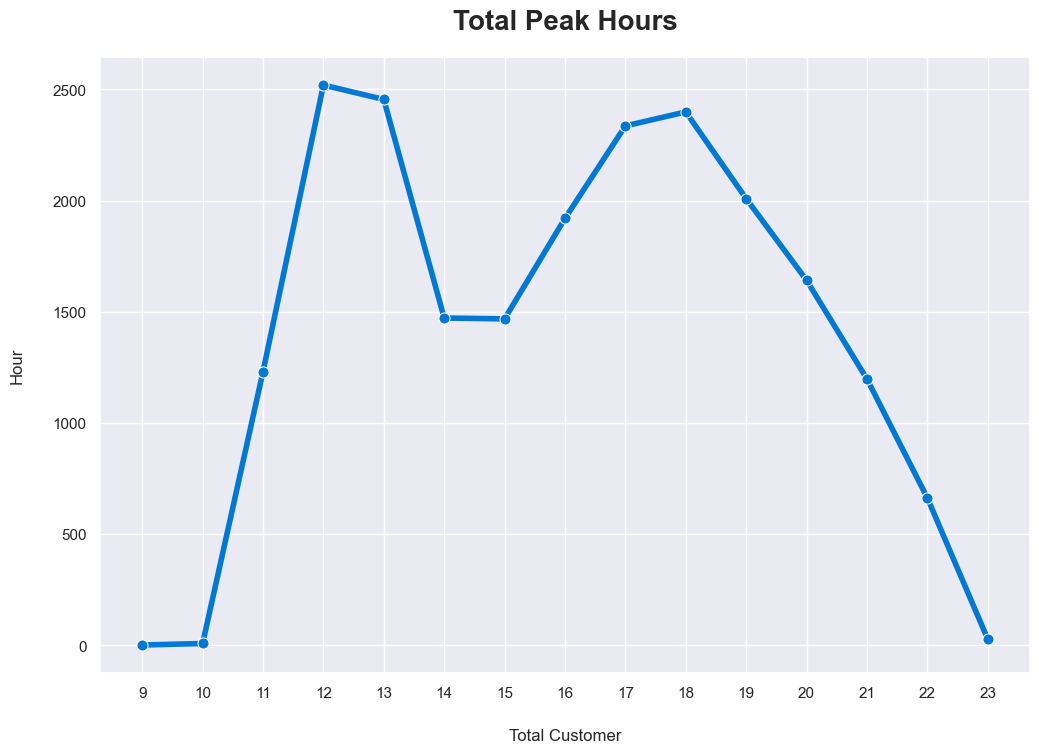

In [68]:
plt.figure(figsize=(12,8))
sns.lineplot(data=peak_hours,
             x='hour',
             y='order_id',
             marker='o',
             markersize=8,
             linewidth=4,
            color='#0078D4')
plt.xticks(list(range(9, 24)))
plt.title('Total Peak Hours', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Total Customer', labelpad=20)
plt.ylabel('Hour', labelpad=20)
plt.show()

## Daily

In [69]:
customer_day = df.groupby(df['date'])['order_id'].nunique().reset_index()
customer_day.sort_values('order_id')

,date,order_id
355,2015-12-29,27
356,2015-12-30,32
353,2015-12-27,35
52,2015-02-22,37
80,2015-03-22,37
...,...,...
134,2015-05-15,94
184,2015-07-04,105
283,2015-10-15,107
323,2015-11-26,113


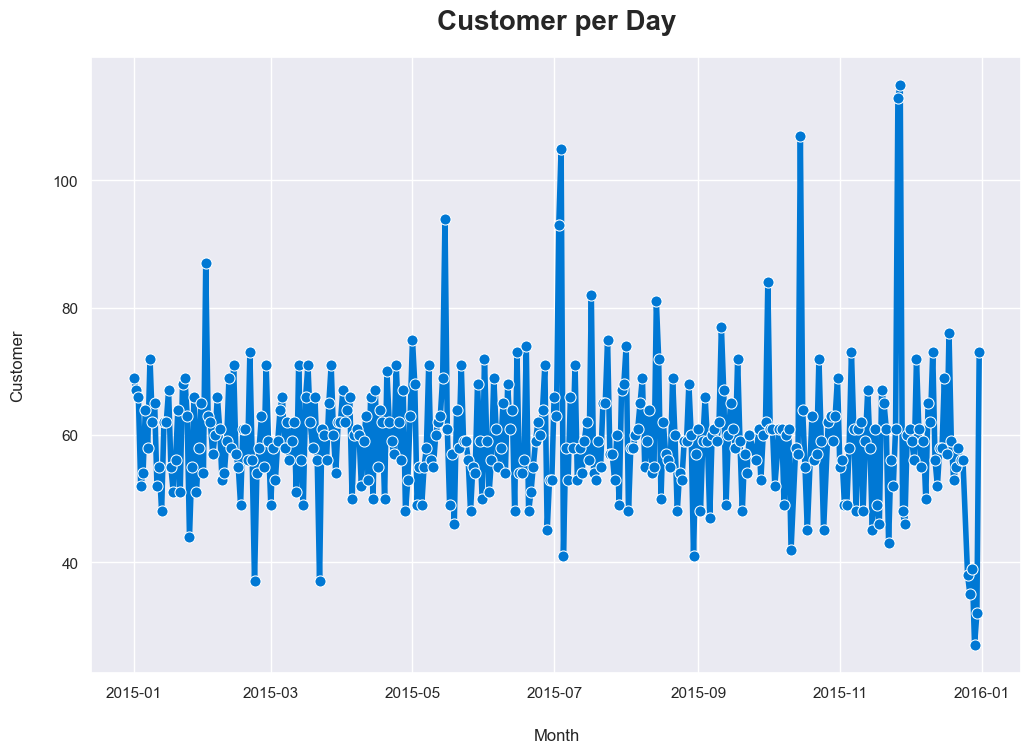

In [70]:
plt.figure(figsize=(12,8))
sns.lineplot(data=customer_day,
             x='date',
             y='order_id',
             marker='o',
             markersize=8,
             linewidth=4,
            color='#0078D4')
plt.title('Customer per Day', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Month', labelpad=20)
plt.ylabel('Customer', labelpad=20)
plt.show()

In [71]:
customer_each_day_per_month = df.groupby([df['date'].dt.month, df['date'].dt.day])['order_id'].nunique()

In [72]:
customer_each_day_per_month = customer_each_day_per_month.rename_axis(index=['month', 'day']).reset_index()

In [73]:
customer_each_day_per_month

,month,day,order_id
0,1,1,69
1,1,2,67
2,1,3,66
3,1,4,52
4,1,5,54
...,...,...,...
353,12,27,35
354,12,28,39
355,12,29,27
356,12,30,32


<Figure size 2400x1000 with 0 Axes>

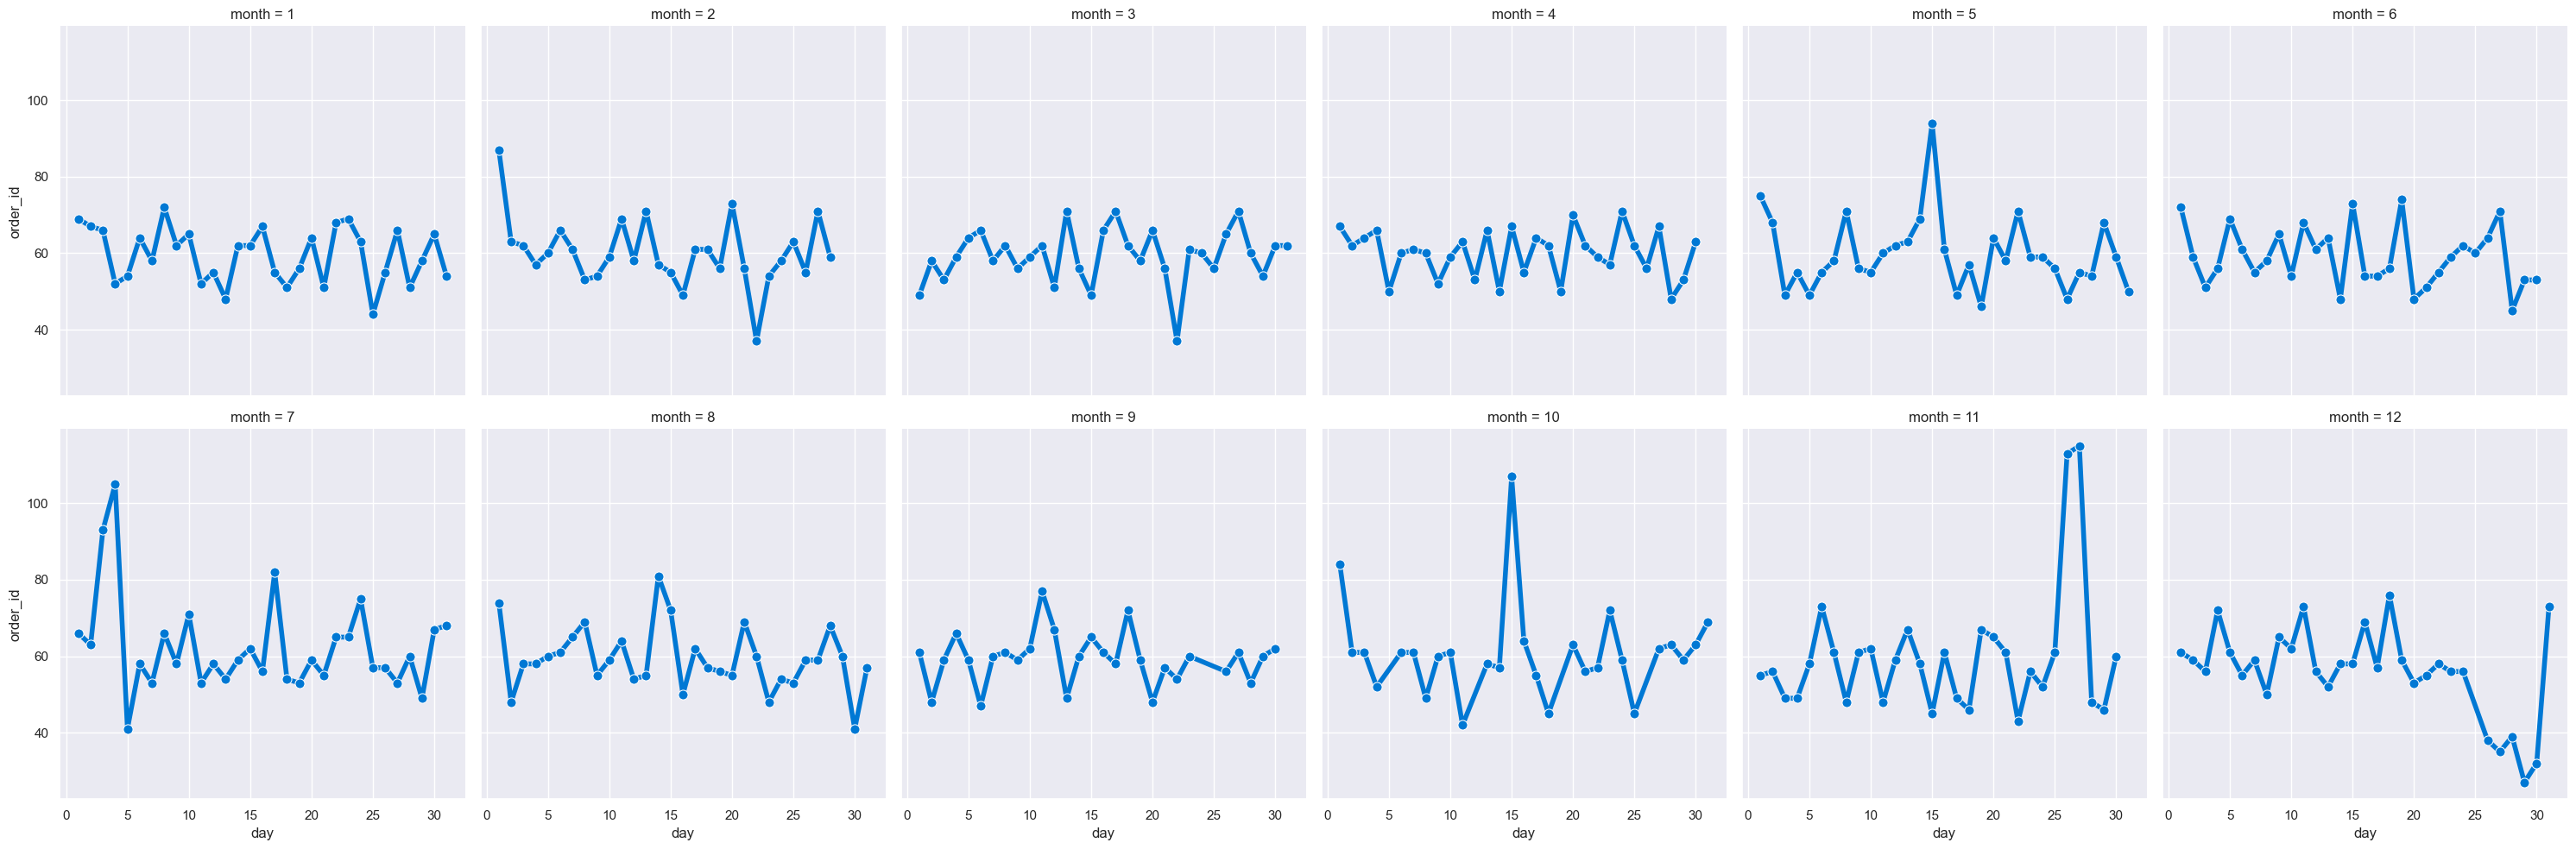

In [74]:
plt.figure(figsize=(24,10))
sns.relplot(kind='line',
            data=customer_each_day_per_month,
            x='day',
            y='order_id',
           col='month',
           col_wrap=6,
             marker='o',
             markersize=8,
             linewidth=4,
            color='#0078D4')
plt.tight_layout()
plt.show()

## Dayweek

In [75]:
dayweek_sales = df.groupby(df['date'].dt.day_name()).agg({
    'order_id': ['nunique', 'count'],
    'quantity': 'sum',
    'total': 'sum'
}).reset_index()
dayweek_sales.columns = ['date', 'nunique', 'count', 'sum', 'total']
dayweek_sales

,date,nunique,count,sum,total
0,Friday,3538,8106,8242,136073.90
1,Monday,2794,6369,6485,107329.55
2,Saturday,3158,7355,7493,123182.40
3,Sunday,2624,5917,6035,99203.50
4,Thursday,3239,7323,7478,123528.50
5,Tuesday,2973,6753,6895,114133.80
6,Wednesday,3024,6797,6946,114408.40


In [76]:
dayweek_sales['date'] = pd.Categorical(dayweek_sales['date'],
                                       categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [77]:
dayweek_sales.sort_values('date', inplace=True)

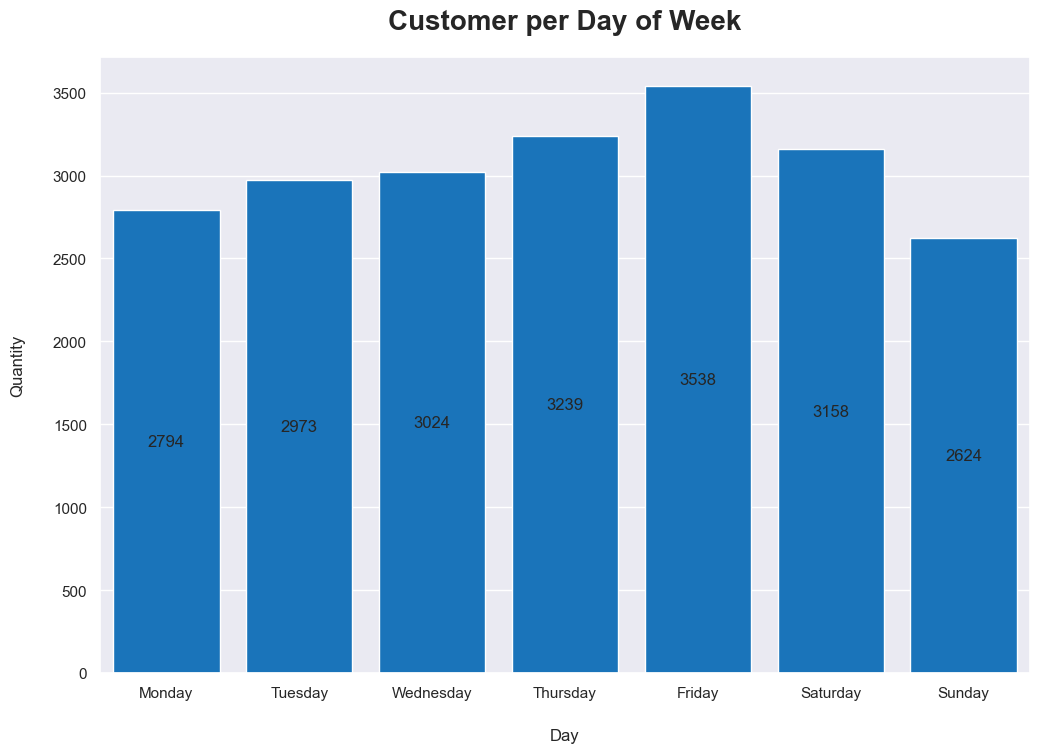

In [78]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dayweek_sales,
                 x='date',
                 y='nunique',
                 color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Customer per Day of Week', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Day', labelpad=20)
plt.ylabel('Quantity', labelpad=20)
plt.show()

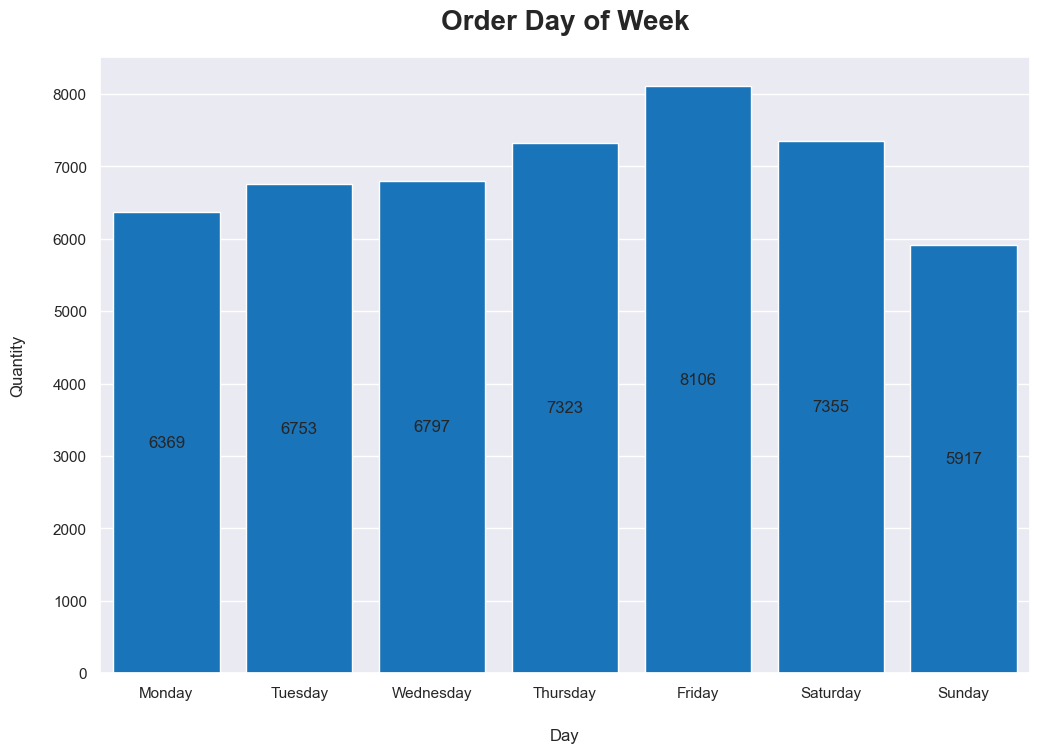

In [79]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dayweek_sales,
                 x='date',
                 y='count',
                 color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Order Day of Week', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Day', labelpad=20)
plt.ylabel('Quantity', labelpad=20)
plt.show()

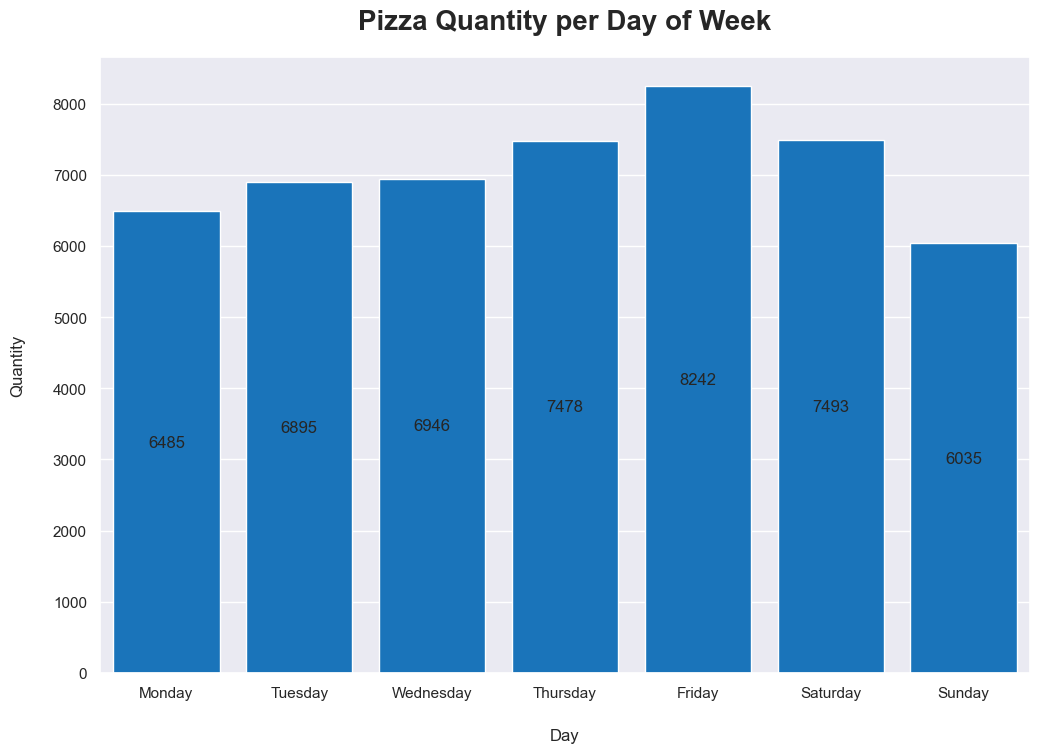

In [80]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dayweek_sales,
                 x='date',
                 y='sum',
                 color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Pizza Quantity per Day of Week', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Day', labelpad=20)
plt.ylabel('Quantity', labelpad=20)
plt.show()

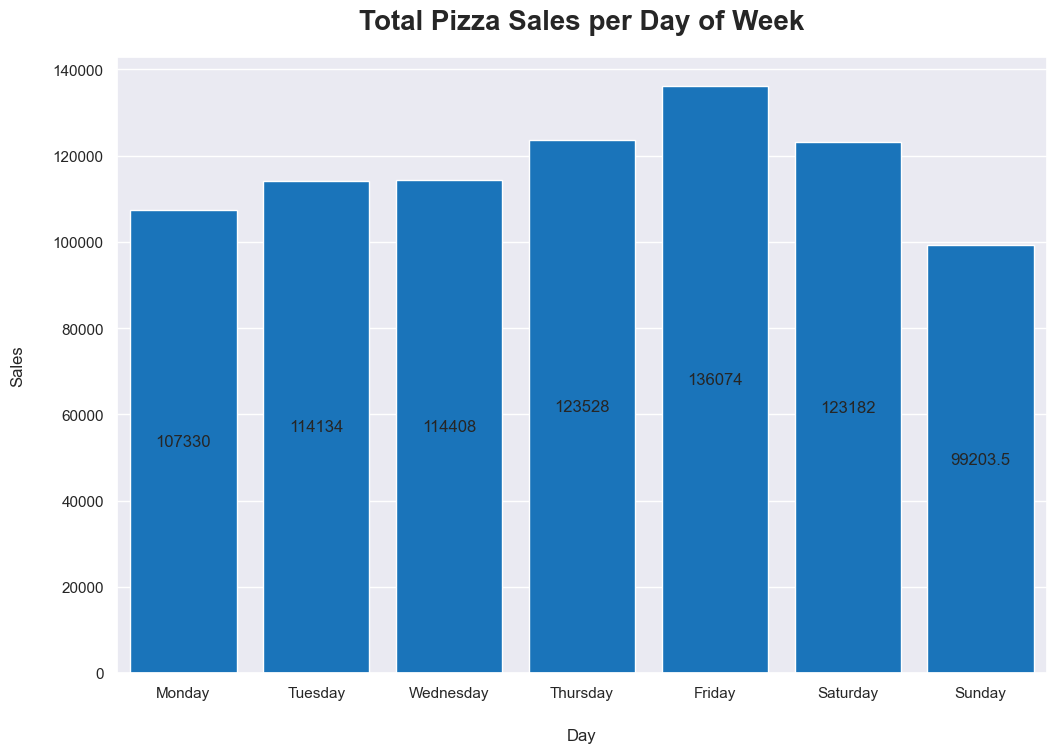

In [81]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dayweek_sales,
                 x='date',
                 y='total',
                 color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Total Pizza Sales per Day of Week', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Day', labelpad=20)
plt.ylabel('Sales', labelpad=20)
plt.show()

In [125]:
df.groupby(df['date'].dt.month)['total'].sum()

date
1     69793.30
2     65159.60
3     70397.10
4     68736.80
5     71402.75
6     68230.20
7     72557.90
8     68278.25
9     64180.05
10    64027.60
11    70395.35
12    64701.15
Name: total, dtype: float64

## Monthly

In [82]:
monthly = df.groupby(df['date'].dt.month).agg({
    'order_id': ['nunique', 'count'],
    'quantity': 'sum',
    'total': 'sum'
}).reset_index()
monthly.columns = ['date', 'customer', 'count', 'quantity', 'sales']
monthly

,date,customer,count,quantity,sales
0,1,1845,4156,4232,69793.30
1,2,1685,3892,3961,65159.60
2,3,1840,4186,4261,70397.10
3,4,1799,4067,4151,68736.80
4,5,1853,4239,4328,71402.75
5,6,1773,4025,4107,68230.20
6,7,1935,4301,4392,72557.90
7,8,1841,4094,4168,68278.25
8,9,1661,3819,3890,64180.05
9,10,1646,3797,3883,64027.60


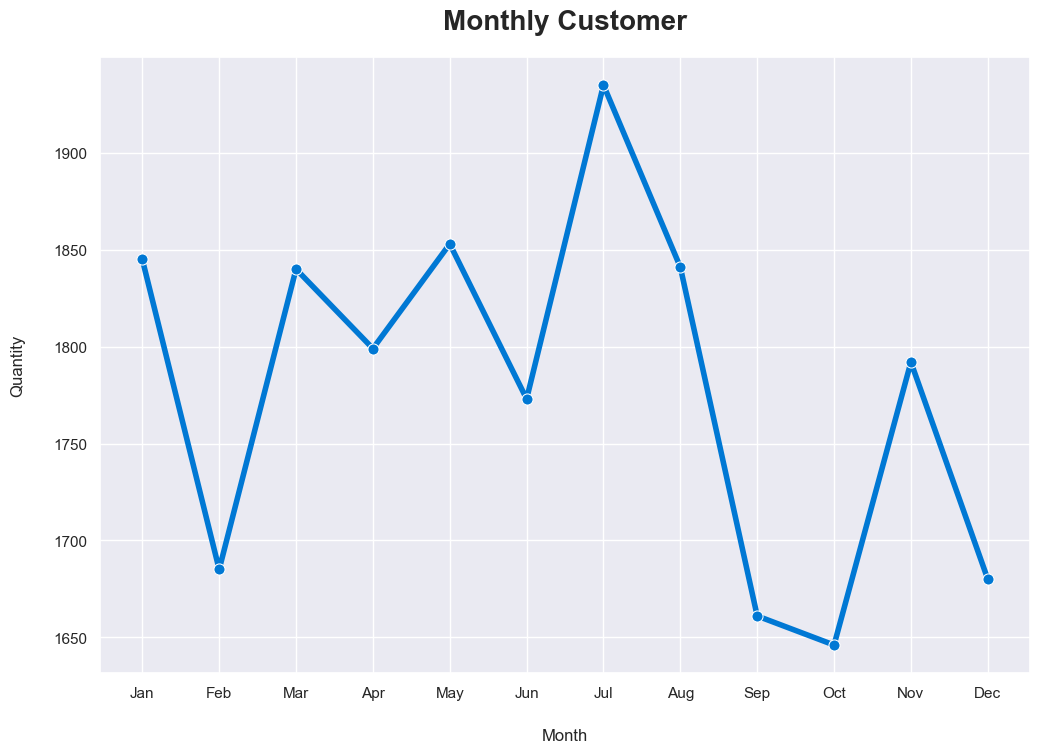

In [83]:
plt.figure(figsize=(12,8))
sns.lineplot(data=monthly,
             x='date',
             y='customer',
             marker='o',
             markersize=8,
             linewidth=4,
            color='#0078D4')
plt.xticks(list(range(1,13)),
          labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Customer', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Month', labelpad=20)
plt.ylabel('Quantity', labelpad=20)
plt.show()

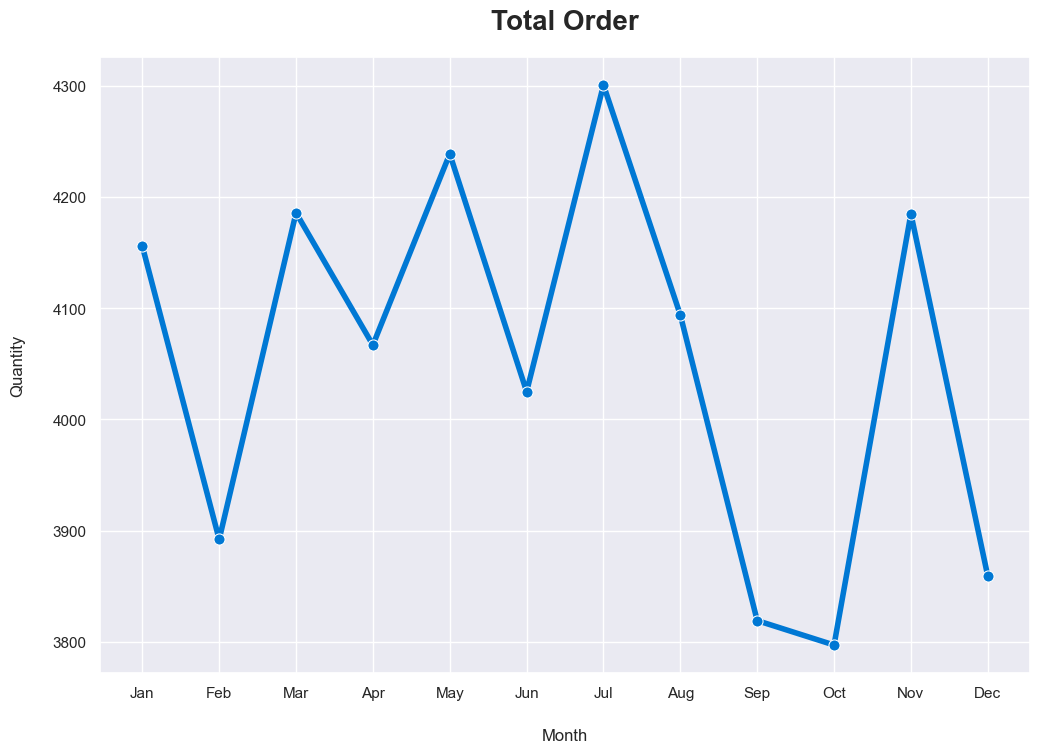

In [84]:
plt.figure(figsize=(12,8))
sns.lineplot(data=monthly,
             x='date',
             y='count',
             marker='o',
             markersize=8,
             linewidth=4,
            color='#0078D4')
plt.xticks(list(range(1,13)),
          labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Total Order', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Month', labelpad=20)
plt.ylabel('Quantity', labelpad=20)
plt.show()

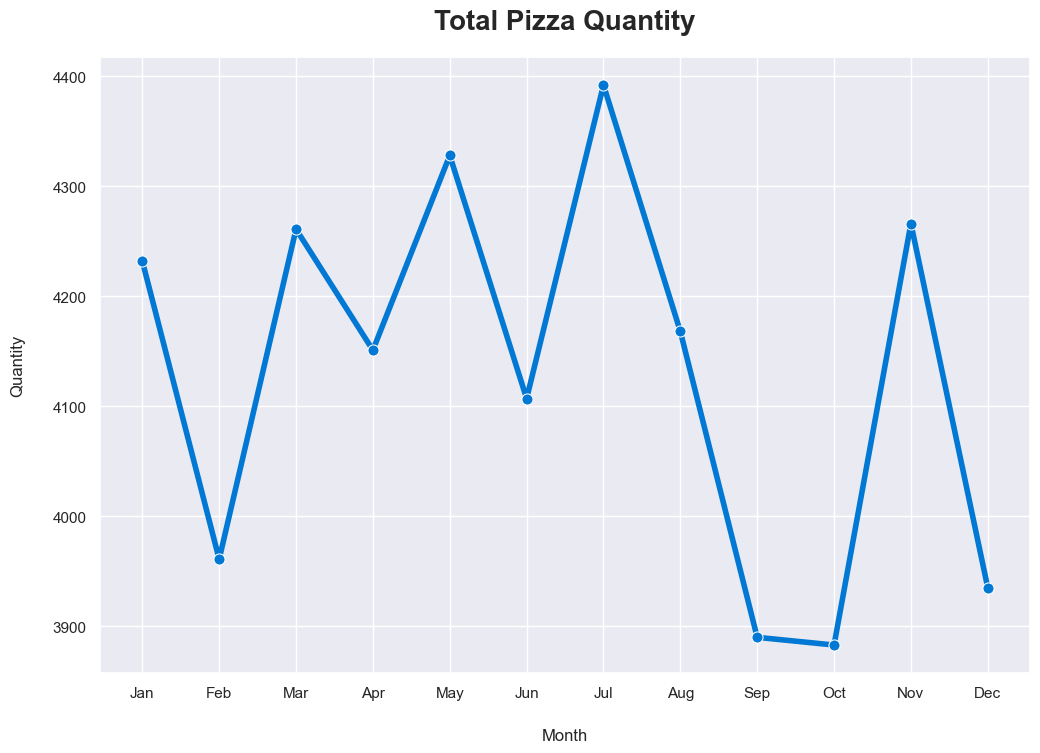

In [85]:
plt.figure(figsize=(12,8))
sns.lineplot(data=monthly,
             x='date',
             y='quantity',
             marker='o',
             markersize=8,
             linewidth=4,
            color='#0078D4')
plt.xticks(list(range(1,13)),
          labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Total Pizza Quantity', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Month', labelpad=20)
plt.ylabel('Quantity', labelpad=20)
plt.show()

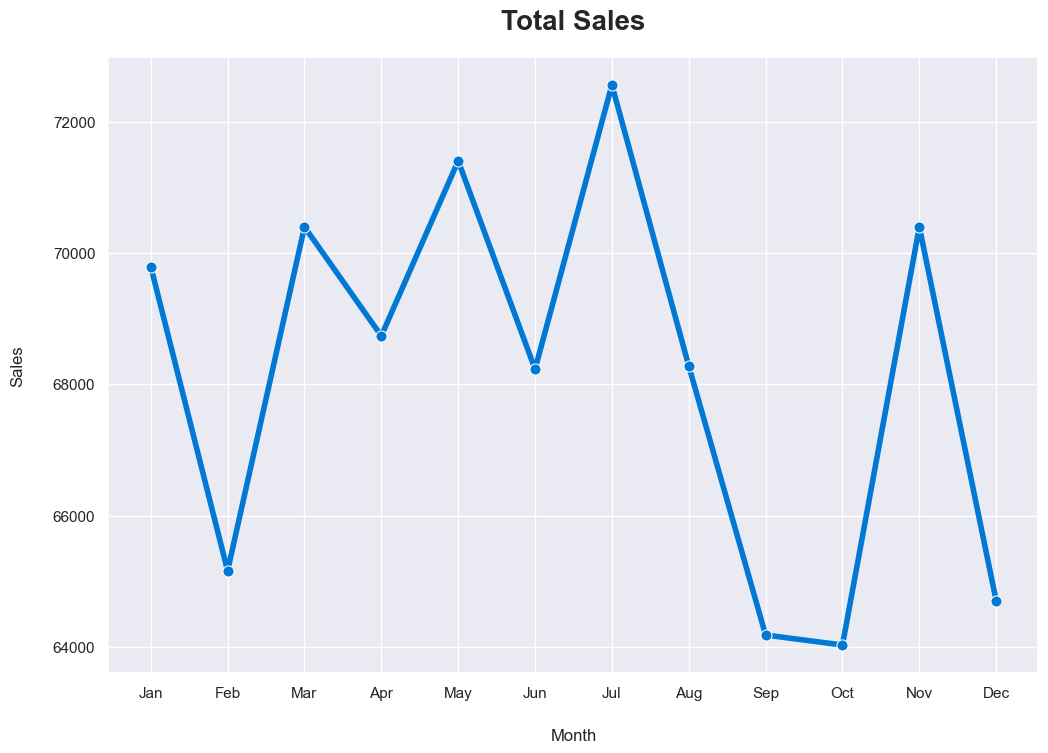

In [86]:
plt.figure(figsize=(12,8))
sns.lineplot(data=monthly,
             x='date',
             y='sales',
             marker='o',
             markersize=8,
             linewidth=4,
            color='#0078D4')
plt.xticks(list(range(1,13)),
          labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Total Sales', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Month', labelpad=20)
plt.ylabel('Sales', labelpad=20)
plt.show()

## Popular and Worst Pizza

In [87]:
top_5_pizza = df.groupby('name').agg({
    'order_id': 'count',
    'quantity': 'sum',
    'total': 'sum'
}).sort_values(by=['order_id', 'quantity', 'total'], ascending=False).iloc[:5].reset_index()
top_5_pizza

,name,order_id,quantity,total
0,The Classic Deluxe Pizza,2416,2453,38180.50
1,The Barbecue Chicken Pizza,2372,2432,42768.00
2,The Hawaiian Pizza,2370,2422,32273.25
3,The Pepperoni Pizza,2369,2418,30161.75
4,The Thai Chicken Pizza,2315,2371,43434.25


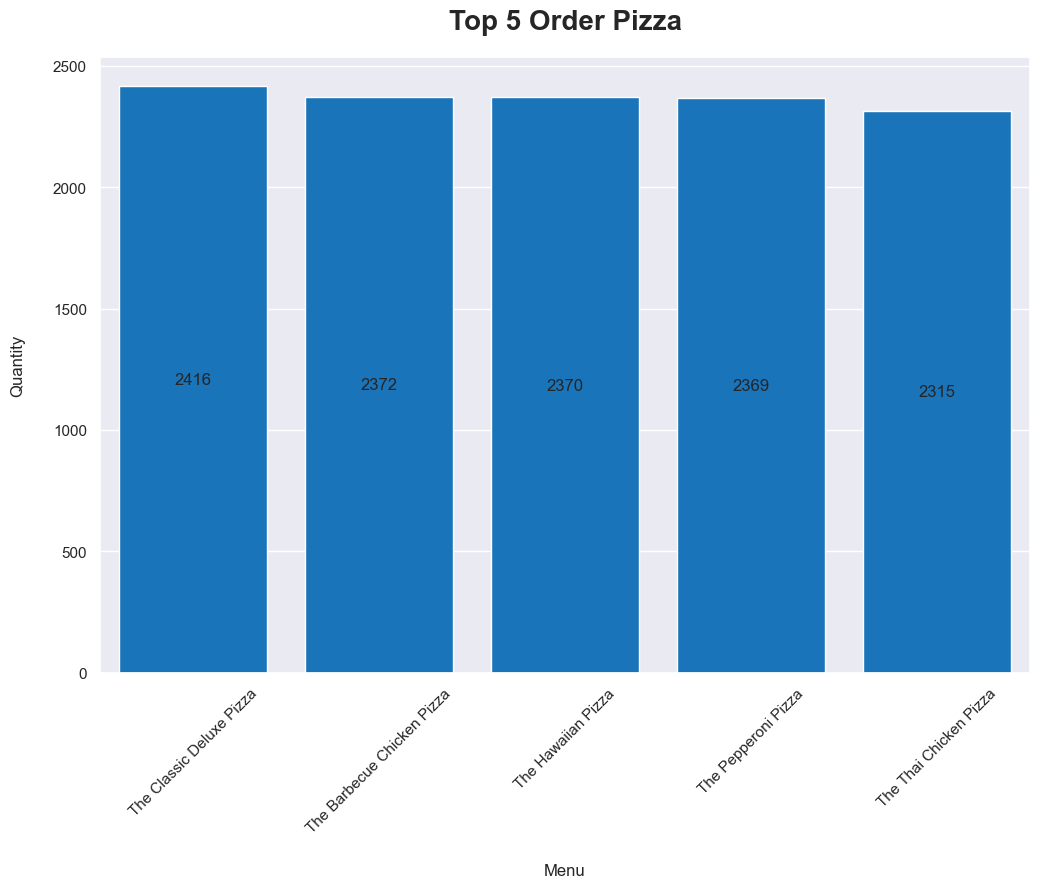

In [88]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=top_5_pizza,
                 x='name',
                 y='order_id',
                color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.xticks(rotation=45)
plt.title('Top 5 Order Pizza', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Menu', labelpad=20)
plt.ylabel('Quantity', labelpad=20)
plt.show()

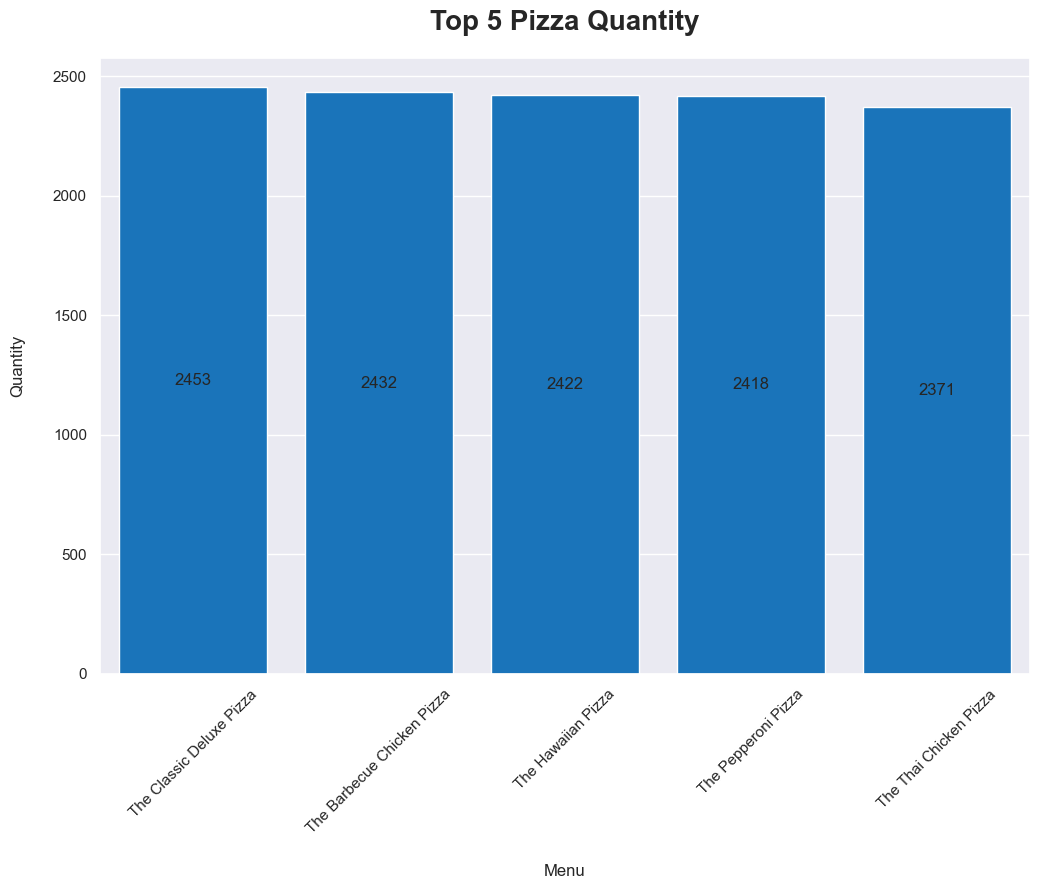

In [89]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=top_5_pizza,
                 x='name',
                 y='quantity',
                color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.xticks(rotation=45)
plt.title('Top 5 Pizza Quantity', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Menu', labelpad=20)
plt.ylabel('Quantity', labelpad=20)
plt.show()

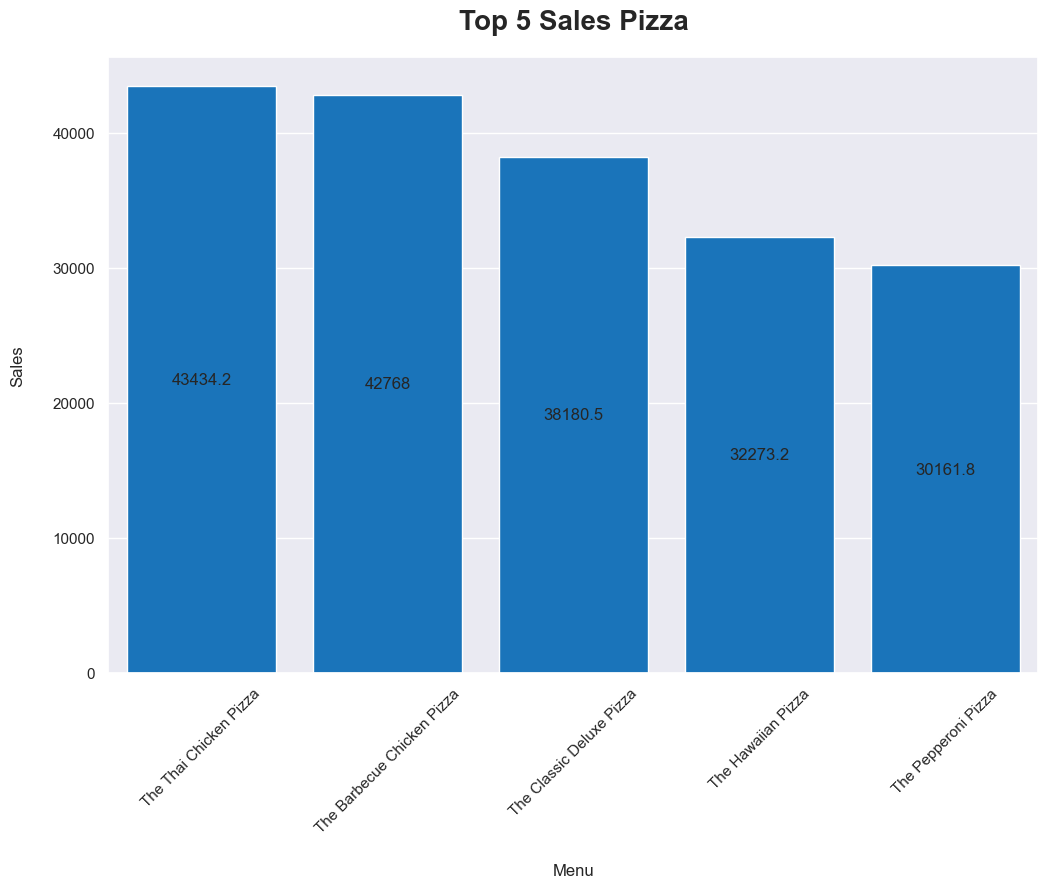

In [90]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=top_5_pizza.sort_values(by='total', ascending=False),
                 x='name',
                 y='total',
                 color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.xticks(rotation=45)
plt.title('Top 5 Sales Pizza', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Menu', labelpad=20)
plt.ylabel('Sales', labelpad=20)
plt.show()

In [91]:
worst_5_pizza = df.groupby('name').agg({
    'order_id': 'count',
    'quantity': 'sum',
    'total': 'sum'
}).sort_values(by=['order_id', 'quantity', 'total'], ascending=True).iloc[:5].reset_index()
worst_5_pizza

,name,order_id,quantity,total
0,The Brie Carre Pizza,480,490,11588.50
1,The Mediterranean Pizza,923,934,15360.50
2,The Calabrese Pizza,927,937,15934.25
3,The Spinach Supreme Pizza,940,950,15277.75
4,The Soppressata Pizza,957,961,16425.75


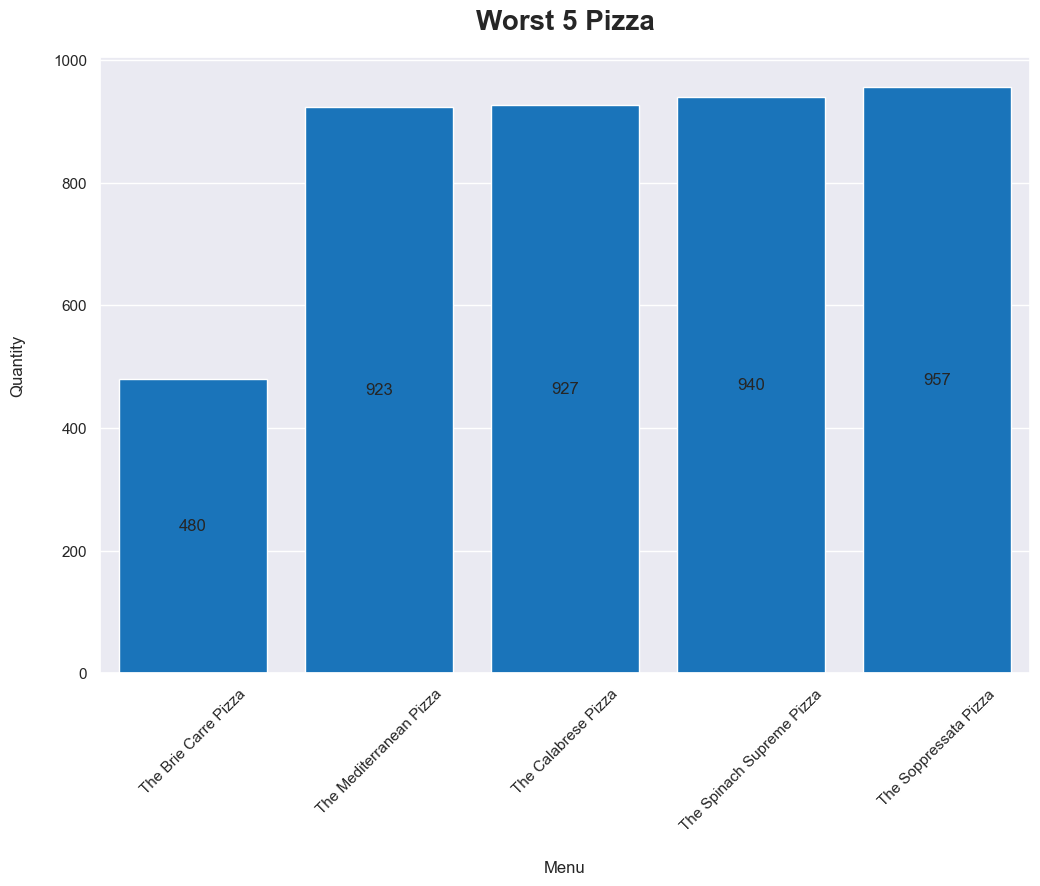

In [92]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=worst_5_pizza,
                 x='name',
                 y='order_id',
                color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.xticks(rotation=45)
plt.title('Worst 5 Pizza', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Menu', labelpad=20)
plt.ylabel('Quantity', labelpad=20)
plt.show()

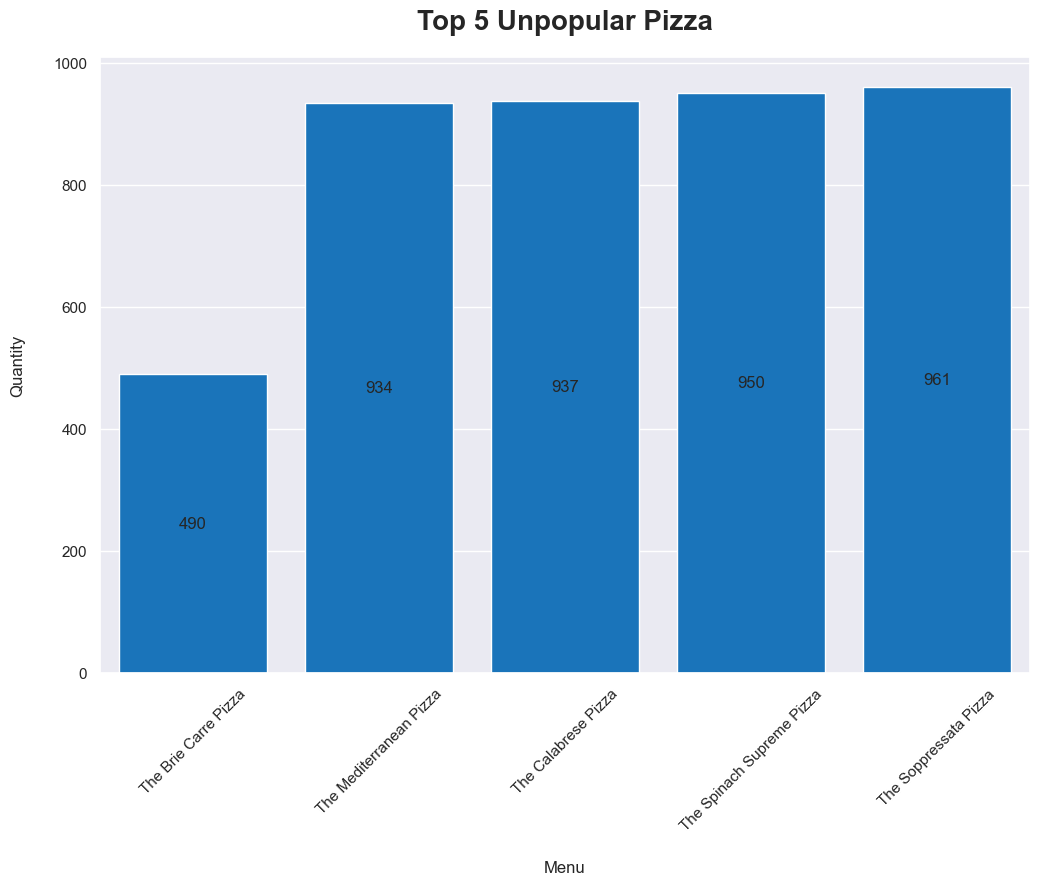

In [93]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=worst_5_pizza,
                 x='name',
                 y='quantity',
                 color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.xticks(rotation=45)
plt.title('Top 5 Unpopular Pizza', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Menu', labelpad=20)
plt.ylabel('Quantity', labelpad=20)
plt.show()

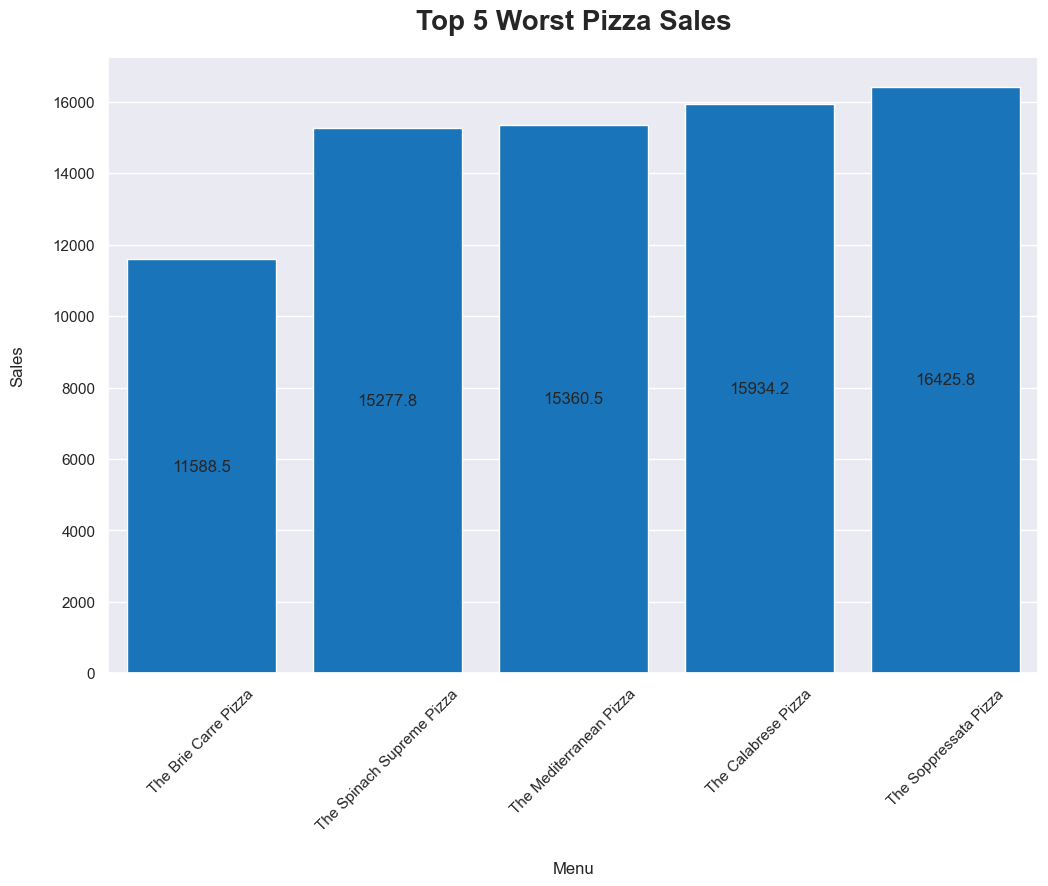

In [94]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=worst_5_pizza.sort_values('total', ascending=True),
                 x='name',
                 y='total',
                 color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.xticks(rotation=45)
plt.title('Top 5 Worst Pizza Sales', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Menu', labelpad=20)
plt.ylabel('Sales', labelpad=20)
plt.show()

## Category

In [95]:
pizza_category = df.groupby('category').agg({
    'order_id': 'count',
    'quantity': 'sum',
    'total': 'sum'
}).reset_index()
pizza_category

,category,order_id,quantity,total
0,Chicken,10815,11050,195919.50
1,Classic,14579,14888,220053.10
2,Supreme,11777,11987,208197.00
3,Veggie,11449,11649,193690.45


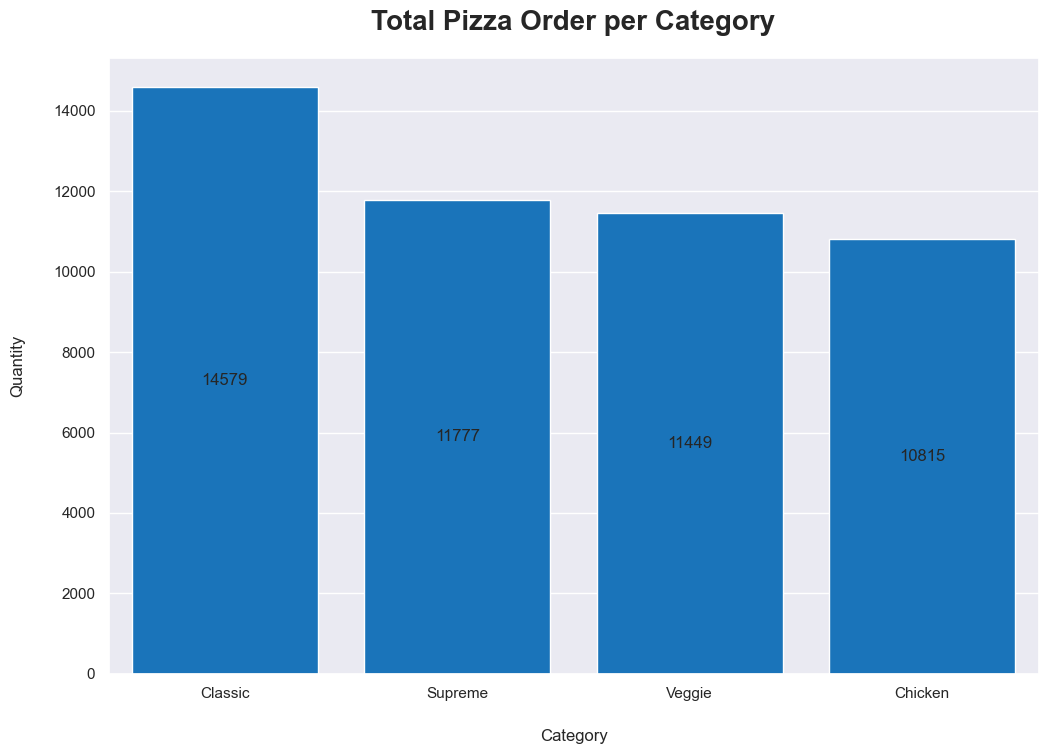

In [96]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=pizza_category.sort_values('order_id', ascending=False),
                 x='category',
                 y='order_id',
                 color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Total Pizza Order per Category', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Category', labelpad=20)
plt.ylabel('Quantity', labelpad=20)
plt.show()

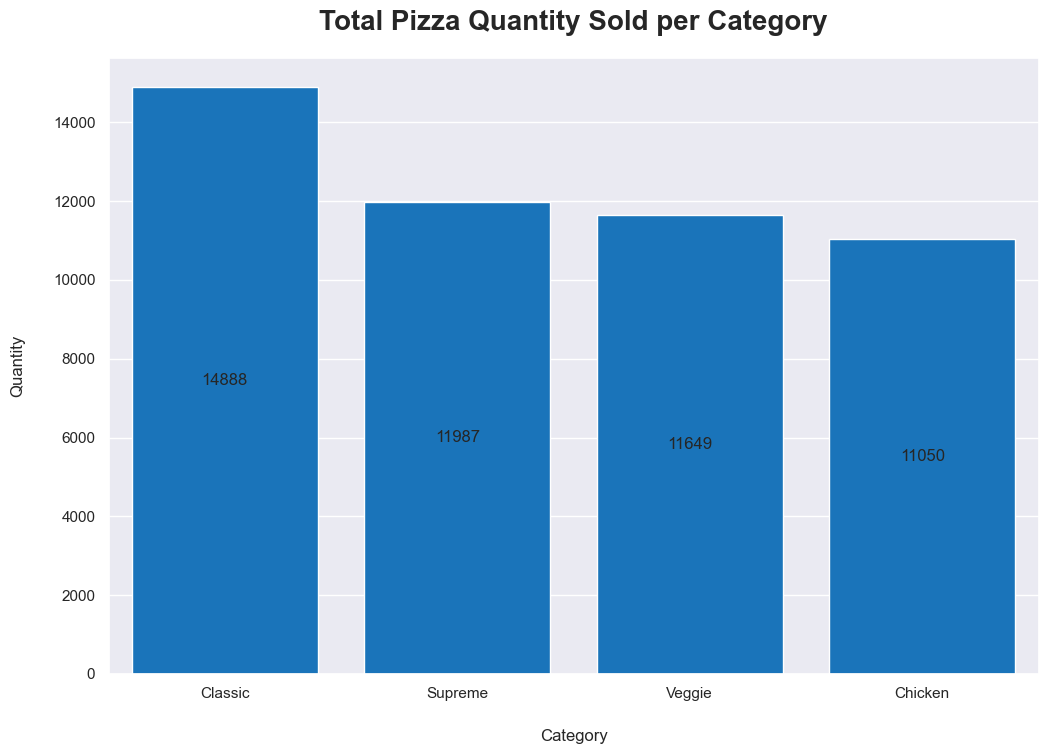

In [97]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=pizza_category.sort_values('quantity', ascending=False),
                 x='category',
                 y='quantity',
                 color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Total Pizza Quantity Sold per Category', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Category', labelpad=20)
plt.ylabel('Quantity', labelpad=20)
plt.show()

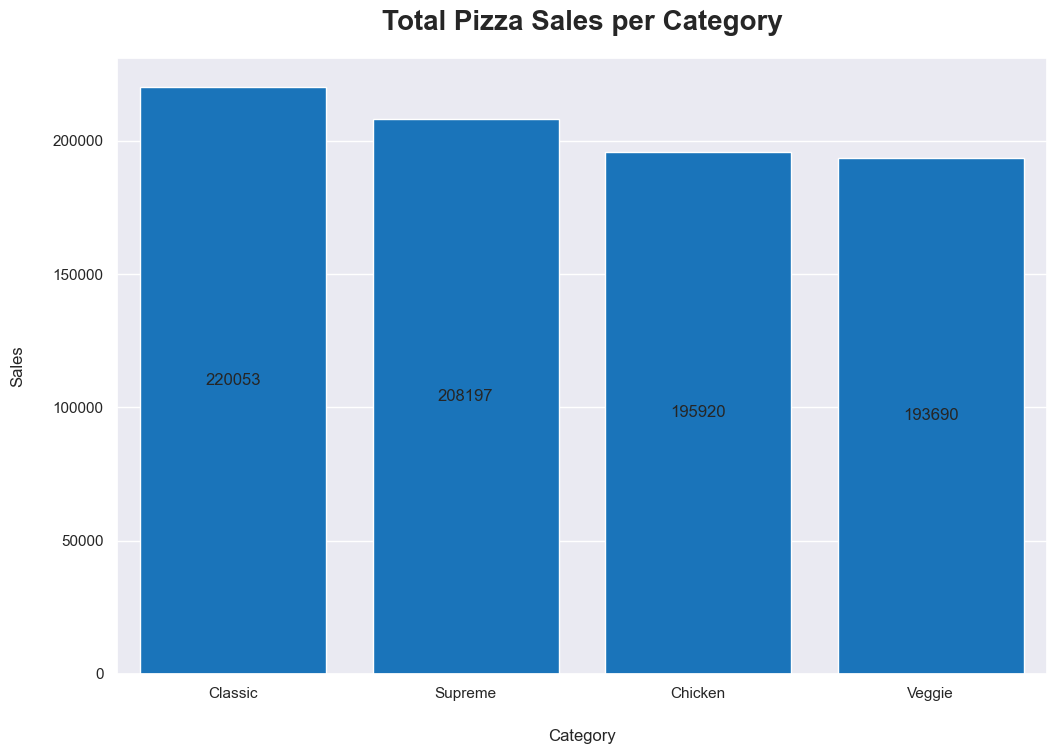

In [98]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=pizza_category.sort_values('total', ascending=False),
                 x='category',
                 y='total',
                 color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Total Pizza Sales per Category', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Category', labelpad=20)
plt.ylabel('Sales', labelpad=20)
plt.show()

In [99]:
pizza_category_monthly = df.groupby([df['date'].dt.month, 'category']).agg({
    'order_id': 'count',
    'quantity': 'sum',
    'total': 'sum'
}).reset_index()
pizza_category_monthly

,date,category,order_id,quantity,total
0,1,Chicken,894,913,16188.75
1,1,Classic,1238,1257,18619.40
2,1,Supreme,1026,1044,17929.75
3,1,Veggie,998,1018,17055.40
4,2,Chicken,859,875,15468.25
5,2,Classic,1158,1178,17336.10
6,2,Supreme,948,964,16718.85
7,2,Veggie,927,944,15636.40
8,3,Chicken,981,994,17625.50
9,3,Classic,1211,1236,18116.60


<Axes: xlabel='date', ylabel='order_id'>

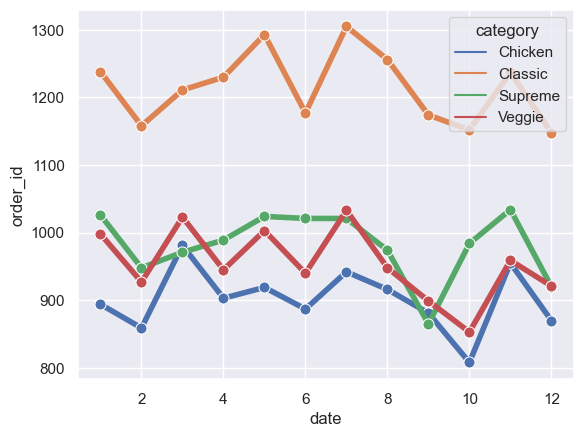

In [100]:
sns.lineplot(data=pizza_category_monthly,
            x='date',
            y='order_id',
            hue='category',
             marker='o',
             markersize=8,
             linewidth=4)

<Axes: xlabel='date', ylabel='quantity'>

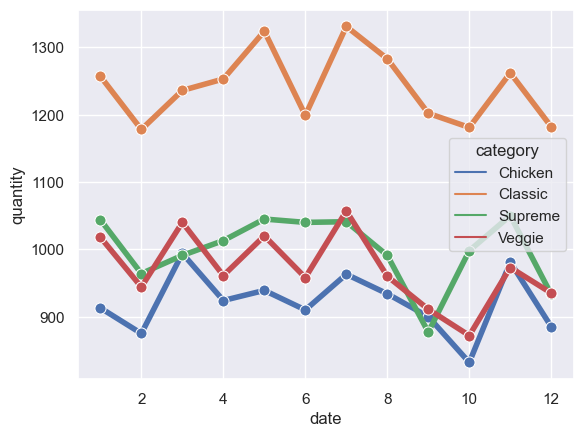

In [101]:
sns.lineplot(data=pizza_category_monthly,
            x='date',
            y='quantity',
            hue='category',
             marker='o',
             markersize=8,
             linewidth=4)

<Axes: xlabel='date', ylabel='total'>

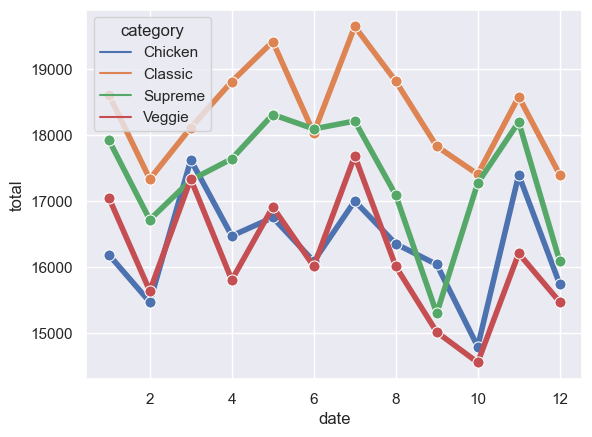

In [102]:
sns.lineplot(data=pizza_category_monthly,
            x='date',
            y='total',
            hue='category',
             marker='o',
             markersize=8,
             linewidth=4)

## Size

In [103]:
pizza_size = df.groupby('size').agg({
    'order_id': 'count',
    'quantity': 'sum',
    'total': 'sum'
}).reset_index()
pizza_size

,size,order_id,quantity,total
0,L,18526,18956,375318.70
1,M,15385,15635,249382.25
2,S,14137,14403,178076.50
3,XL,544,552,14076.00
4,XXL,28,28,1006.60


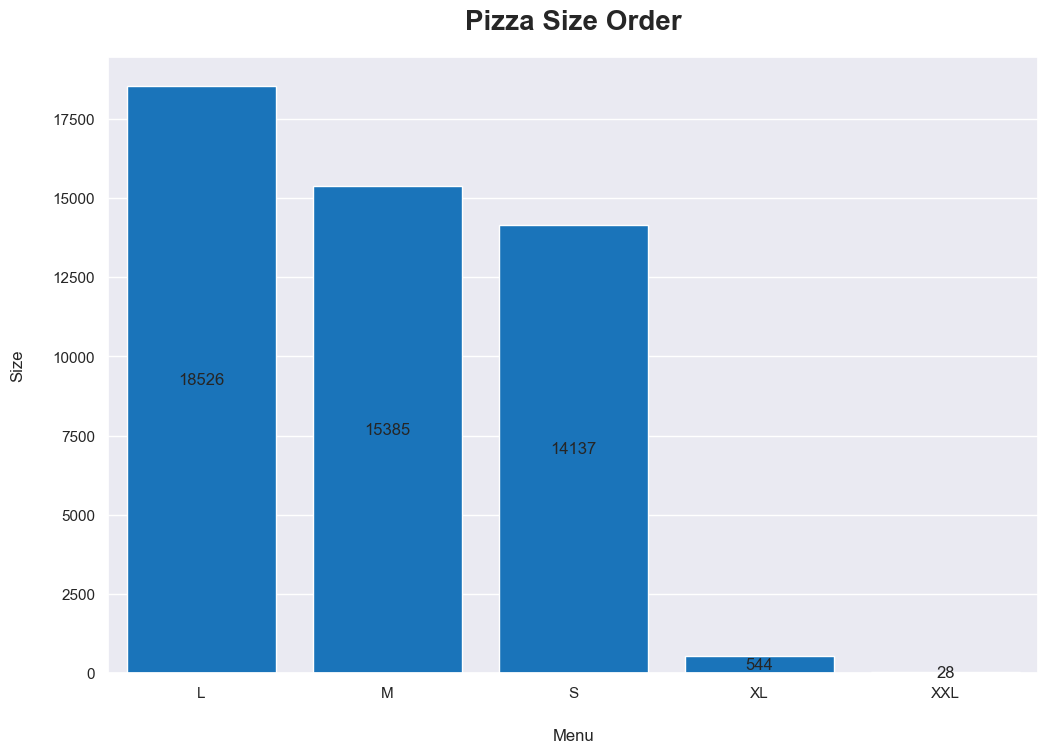

In [104]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=pizza_size,
                x='size',
                y='order_id',
                color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Pizza Size Order', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Menu', labelpad=20)
plt.ylabel('Size', labelpad=20)
plt.show()

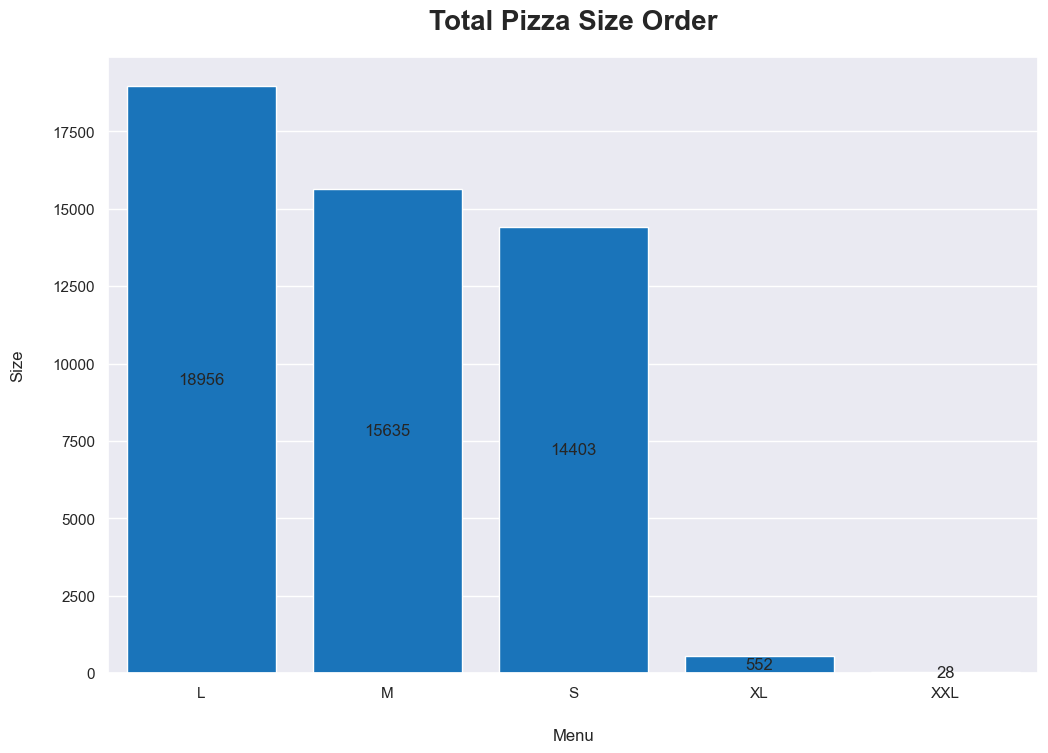

In [105]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=pizza_size,
                x='size',
                y='quantity',
                color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Total Pizza Size Order', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Menu', labelpad=20)
plt.ylabel('Size', labelpad=20)
plt.show()

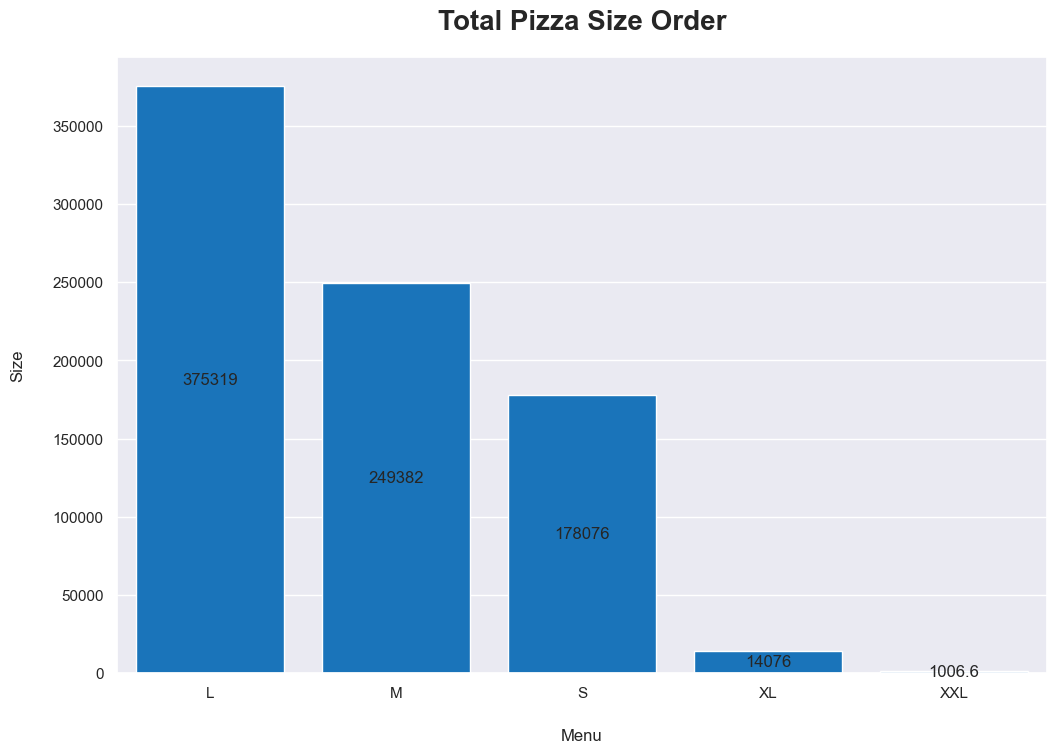

In [106]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=pizza_size,
                x='size',
                y='total',
                color='#0078D4')
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Total Pizza Size Order', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Menu', labelpad=20)
plt.ylabel('Size', labelpad=20)
plt.show()

## Name

In [107]:
df.groupby('name').agg({
    'quantity': 'sum',
    'total': 'sum'
}).sort_values('quantity', ascending=False)

,quantity,total
name,,
The Classic Deluxe Pizza,2453,38180.50
The Barbecue Chicken Pizza,2432,42768.00
The Hawaiian Pizza,2422,32273.25
The Pepperoni Pizza,2418,30161.75
The Thai Chicken Pizza,2371,43434.25
The California Chicken Pizza,2370,41409.50
The Sicilian Pizza,1938,30940.50
The Spicy Italian Pizza,1924,34831.25
The Southwest Chicken Pizza,1917,34705.75


# Bundling

In [108]:
data = df.copy()

In [109]:
df_mba = data[['order_id', 'date', 'quantity', 'name']]
df_mba.head()

,order_id,date,quantity,name
0,1,2015-01-01,1,The Hawaiian Pizza
1,77,2015-01-02,1,The Hawaiian Pizza
2,146,2015-01-03,1,The Hawaiian Pizza
3,163,2015-01-03,1,The Hawaiian Pizza
4,247,2015-01-04,1,The Hawaiian Pizza


In [110]:
market = data.groupby(['name'])['quantity'].sum().reset_index()

In [111]:
total_q = market.sort_values(by='quantity', ascending=False)
total_q.iloc[16:]

,name,quantity
29,The Spinach and Feta Pizza,1446
19,The Pepper Salami Pizza,1446
13,The Italian Capocollo Pizza,1438
10,The Greek Pizza,1420
8,The Five Cheese Pizza,1409
21,"The Pepperoni, Mushroom, and Peppers Pizza",1359
11,The Green Garden Pizza,997
5,The Chicken Alfredo Pizza,987
15,The Italian Vegetables Pizza,981
6,The Chicken Pesto Pizza,973


In [112]:
print("Top 5 most:")
display(total_q.head(5))
print("\nBottom 5:")
display(total_q.tail(5))

Top 5 most:


,name,quantity
7,The Classic Deluxe Pizza,2453
0,The Barbecue Chicken Pizza,2432
12,The Hawaiian Pizza,2422
20,The Pepperoni Pizza,2418
30,The Thai Chicken Pizza,2371



Bottom 5:


,name,quantity
24,The Soppressata Pizza,961
28,The Spinach Supreme Pizza,950
3,The Calabrese Pizza,937
16,The Mediterranean Pizza,934
2,The Brie Carre Pizza,490


Based on EDA in quantity ordered the most bought are **The Classic Deluxe Pizza,The Barbecue Chicken Pizza,The Hawaiian Pizza**

and the least one are **The Calabrese Pizza, The Mediterranean Pizza,The Brie Carre Pizza**

In [113]:
def hot_encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [114]:
mba = df_mba.groupby(['order_id', 'name'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('order_id').applymap(hot_encode)

In [115]:
mba = mba[(mba > 0).sum(axis=1) >= 2]
mba

name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,The Greek Pizza,The Green Garden Pizza,The Hawaiian Pizza,The Italian Capocollo Pizza,The Italian Supreme Pizza,The Italian Vegetables Pizza,The Mediterranean Pizza,The Mexicana Pizza,The Napolitana Pizza,The Pepper Salami Pizza,The Pepperoni Pizza,"The Pepperoni, Mushroom, and Peppers Pizza",The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21344,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21345,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21346,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [116]:
frequent_itemset = apriori(mba, min_support=0.02, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x: len(x))
frequent_itemset

,support,itemsets,length
0,0.146508,(The Pepperoni Pizza),1
1,0.146278,(The Classic Deluxe Pizza),1
2,0.142671,(The Barbecue Chicken Pizza),1
3,0.141136,(The Thai Chicken Pizza),1
4,0.140752,(The Hawaiian Pizza),1
5,0.138450,(The California Chicken Pizza),1
6,0.115196,(The Southwest Chicken Pizza),1
7,0.114965,(The Four Cheese Pizza),1
8,0.114505,(The Big Meat Pizza),1
9,0.113507,(The Sicilian Pizza),1


There are two :  (The Hawaiian Pizza, The Thai Chicken Pizza)	, (The Pepperoni Pizza, The Barbecue Chicken Pizza)

In [117]:
rules = association_rules(frequent_itemset, metric='confidence', min_threshold=0.1).sort_values('confidence', ascending=False).reset_index(drop=True)
rules_l = rules.sort_values(by='lift', ascending=False)
rules_l

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(The Hawaiian Pizza),(The Thai Chicken Pizza),0.140752,0.141136,0.020721,0.147219,1.043103,0.000856,1.007134,0.048091
1,(The Thai Chicken Pizza),(The Hawaiian Pizza),0.141136,0.140752,0.020721,0.146819,1.043103,0.000856,1.007111,0.048112
2,(The Barbecue Chicken Pizza),(The Pepperoni Pizza),0.142671,0.146508,0.020645,0.144701,0.987669,-0.000258,0.997888,-0.014354
3,(The Pepperoni Pizza),(The Barbecue Chicken Pizza),0.146508,0.142671,0.020645,0.140911,0.987669,-0.000258,0.997952,-0.014417


##Try support = 0.01, since to find more varieties in 2 items bought in one transaction

In [118]:
frequent_itemset_2 = apriori(mba, min_support=0.01, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_itemset_2['length'] = frequent_itemset_2['itemsets'].apply(lambda x: len(x))
frequent_itemset_2

,support,itemsets,length
0,0.146508,(The Pepperoni Pizza),1
1,0.146278,(The Classic Deluxe Pizza),1
2,0.142671,(The Barbecue Chicken Pizza),1
3,0.141136,(The Thai Chicken Pizza),1
4,0.140752,(The Hawaiian Pizza),1
...,...,...,...
176,0.010284,"(The Prosciutto and Arugula Pizza, The Spicy I...",2
177,0.010207,"(The Prosciutto and Arugula Pizza, The Sicilia...",2
178,0.010207,"(The Pepperoni, Mushroom, and Peppers Pizza, T...",2
179,0.010130,"(The Southwest Chicken Pizza, The Prosciutto a...",2


In [119]:
rules_2 = association_rules(frequent_itemset_2, metric='confidence', min_threshold=0.1).sort_values('confidence', ascending=False).reset_index(drop=True)
rules_2_l = rules_2.sort_values(by='lift', ascending=False)
rules_2_l.iloc[:30]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(The Mexicana Pizza),(The Hawaiian Pizza),0.091481,0.140752,0.014812,0.161913,1.150340,0.001936,1.025249,0.143851
207,(The Hawaiian Pizza),(The Mexicana Pizza),0.140752,0.091481,0.014812,0.105234,1.150340,0.001936,1.015371,0.152100
209,(The Italian Supreme Pizza),(The Vegetables + Vegetables Pizza),0.112049,0.092325,0.011742,0.104795,1.135056,0.001397,1.013929,0.134001
113,(The Vegetables + Vegetables Pizza),(The Italian Supreme Pizza),0.092325,0.112049,0.011742,0.127182,1.135056,0.001397,1.017338,0.131089
101,(The Greek Pizza),(The Four Cheese Pizza),0.085418,0.114965,0.011128,0.130279,1.133197,0.001308,1.017607,0.128519
117,(The Pepper Salami Pizza),(The Italian Supreme Pizza),0.087030,0.112049,0.010975,0.126102,1.125420,0.001223,1.016081,0.122066
111,(The Big Meat Pizza),(The Sicilian Pizza),0.114505,0.113507,0.014582,0.127346,1.121918,0.001585,1.015858,0.122721
109,(The Sicilian Pizza),(The Big Meat Pizza),0.113507,0.114505,0.014582,0.128465,1.121918,0.001585,1.016018,0.122583
115,(The Italian Capocollo Pizza),(The Sicilian Pizza),0.088642,0.113507,0.011205,0.126407,1.113646,0.001143,1.014766,0.111974
125,(The Sicilian Pizza),(The Spicy Italian Pizza),0.113507,0.112817,0.014121,0.124408,1.102749,0.001316,1.013239,0.105106


Used support 0.005 or 0.5% to see the variaety of transaction that bought 2 in one transaction

In [120]:
frequent_itemset_3 = apriori(mba, min_support=0.005, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_itemset_3['length'] = frequent_itemset_3['itemsets'].apply(lambda x: len(x))
frequent_itemset_3

,support,itemsets,length
0,0.146508,(The Pepperoni Pizza),1
1,0.146278,(The Classic Deluxe Pizza),1
2,0.142671,(The Barbecue Chicken Pizza),1
3,0.141136,(The Thai Chicken Pizza),1
4,0.140752,(The Hawaiian Pizza),1
...,...,...,...
420,0.005065,"(The Five Cheese Pizza, The Spinach Supreme Pi...",2
421,0.005065,"(The Spinach and Feta Pizza, The Chicken Alfre...",2
422,0.005065,"(The Spinach and Feta Pizza, The Spinach Pesto...",2
423,0.005065,"(The Five Cheese Pizza, The Mediterranean Pizza)",2


In [121]:
total_q

,name,quantity
7,The Classic Deluxe Pizza,2453
0,The Barbecue Chicken Pizza,2432
12,The Hawaiian Pizza,2422
20,The Pepperoni Pizza,2418
30,The Thai Chicken Pizza,2371
4,The California Chicken Pizza,2370
23,The Sicilian Pizza,1938
26,The Spicy Italian Pizza,1924
25,The Southwest Chicken Pizza,1917
1,The Big Meat Pizza,1914


In [122]:
rules_3 = association_rules(frequent_itemset_3, metric='confidence', min_threshold=0.1).sort_values('confidence', ascending=False).reset_index(drop=True)
rules_3_l = rules_3.sort_values(by='lift', ascending=False)
rules_3_l.iloc[:50]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
289,(The Italian Vegetables Pizza),"(The Pepperoni, Mushroom, and Peppers Pizza)",0.060860,0.082732,0.006754,0.110971,1.341328,0.001719,1.031764,0.270961
308,(The Mediterranean Pizza),(The Greek Pizza),0.058250,0.085418,0.006293,0.108037,1.264798,0.001318,1.025358,0.222310
72,(The Italian Vegetables Pizza),(The Four Cheese Pizza),0.060860,0.114965,0.008519,0.139975,1.217538,0.001522,1.029080,0.190249
92,(The Spinach Supreme Pizza),(The Sicilian Pizza),0.058557,0.113507,0.008058,0.137615,1.212386,0.001412,1.027954,0.186076
282,(The Chicken Pesto Pizza),(The Vegetables + Vegetables Pizza),0.061781,0.092325,0.006907,0.111801,1.210948,0.001203,1.021927,0.185671
336,(The Italian Vegetables Pizza),(The Spinach and Feta Pizza),0.060860,0.089025,0.006370,0.104666,1.175686,0.000952,1.017469,0.159116
0,(The Brie Carre Pizza),(The Barbecue Chicken Pizza),0.030698,0.142671,0.005142,0.167500,1.174032,0.000762,1.029825,0.152929
123,(The Italian Vegetables Pizza),(The Big Meat Pizza),0.060860,0.114505,0.008135,0.133670,1.167369,0.001166,1.022122,0.152664
330,(The Hawaiian Pizza),(The Mexicana Pizza),0.140752,0.091481,0.014812,0.105234,1.150340,0.001936,1.015371,0.152100
1,(The Mexicana Pizza),(The Hawaiian Pizza),0.091481,0.140752,0.014812,0.161913,1.150340,0.001936,1.025249,0.143851


In [123]:
filter_data = df[df['name'].isin(['The Big Meat Pizza', 'The Thai Chicken Pizza'])].sort_values('order_id')
filter = filter_data.groupby('order_id')['name'].unique().reset_index()
filter[filter['name'].apply(lambda x: len(x) > 1)]

,order_id,name
16,78,"[The Big Meat Pizza, The Thai Chicken Pizza]"
25,115,"[The Thai Chicken Pizza, The Big Meat Pizza]"
29,144,"[The Thai Chicken Pizza, The Big Meat Pizza]"
40,189,"[The Big Meat Pizza, The Thai Chicken Pizza]"
79,394,"[The Thai Chicken Pizza, The Big Meat Pizza]"
...,...,...
3767,21110,"[The Big Meat Pizza, The Thai Chicken Pizza]"
3769,21115,"[The Thai Chicken Pizza, The Big Meat Pizza]"
3779,21158,"[The Big Meat Pizza, The Thai Chicken Pizza]"
3795,21228,"[The Big Meat Pizza, The Thai Chicken Pizza]"


In [124]:
filter_data = df[df['name'].isin(['The Hawaiian Pizza', 'The Thai Chicken Pizza'])].sort_values('order_id')
filter = filter_data.groupby('order_id')['name'].unique().reset_index()
filter[filter['name'].apply(lambda x: len(x) > 1)]

,order_id,name
7,45,"[The Hawaiian Pizza, The Thai Chicken Pizza]"
29,143,"[The Hawaiian Pizza, The Thai Chicken Pizza]"
32,152,"[The Hawaiian Pizza, The Thai Chicken Pizza]"
52,248,"[The Thai Chicken Pizza, The Hawaiian Pizza]"
62,308,"[The Thai Chicken Pizza, The Hawaiian Pizza]"
...,...,...
4212,21208,"[The Hawaiian Pizza, The Thai Chicken Pizza]"
4219,21228,"[The Hawaiian Pizza, The Thai Chicken Pizza]"
4220,21238,"[The Thai Chicken Pizza, The Hawaiian Pizza]"
4223,21248,"[The Hawaiian Pizza, The Thai Chicken Pizza]"


**Top Pizza** = 

**(The Hawaiian Pizza) >>>	(The Thai Chicken Pizza)**

Support=0.020721

Confidence=0.147219

Lift=1.043103

 **(The Big Meat Pizza) --> (The Sicilian Pizza)**
 
Support = 0.014582

Confidence = 0.127346

Lift = 1.121918

**(The Thai Chicken Pizza) --> (The Big Meat Pizza)**

Support=0.017038	

Confidence=0.120718

Lift=1.054258	


**mid+mid or mid+ top Pizza **=

 **(The Mexicana Pizza)-->	(The Hawaiian Pizza)**

Support=0.014812

Confidence=0.161913

Lift=1.150340


  **(The Vegetables + Vegetables Pizza) -- > 	(The Italian Supreme Pizza)**

Support=0.011742

Confidence=0.127182

Lift=1.135056

**(The Greek Pizza) -->	(The Four Cheese Pizza)**

Support=0.011128

Confidence=0.130279

Lift=1.133197


**less+Top / mid+less Pizza** = 

**(The Brie Carre Pizza)-->	(The Barbecue Chicken Pizza)**


Support=0.005142

Confidence=0.167500

Lift=1.174032

**(The Italian Vegetables Pizza)	(The Four Cheese Pizza)**

Support=0.008519

Confidence=0.139975

Lift=1.217538

**(The Chicken Pesto Pizza)	(The Classic Deluxe Pizza)**

Support=0.009977

Confidence=0.161491

Lift=1.104000